In [1]:
import numpy as np
import pandas as pd
import yfinance as yf
import warnings
import riskfolio as rp

warnings.filterwarnings("ignore")
pd.options.display.float_format = '{:.2%}'.format

# Date range
start = '2022-03-01'
end = '2022-07-31'

# Tickers of assets
assets = """AXISBANK.NS	BPCL.NS	BRITANNIA.NS	CIPLA.NS	DRREDDY.NS	EICHERMOT.NS	GAIL.NS	HDFCBANK.NS	HINDALCO.NS	HINDUNILVR.NS	INFY.NS	IOC.NS	ITC.NS	M&M.NS	MARICO.NS	ONGC.NS	RELIANCE.NS	SAIL.NS	SBIN.NS	SIEMENS.NS	SUNPHARMA.NS	TATACONSUM.NS	TATAMOTORS.NS	TATAPOWER.NS	TATASTEEL.NS	TITAN.NS	VEDL.NS	WIPRO.NS""".split("\t")

#assets = [x + ".NS" for x in assets]
assets.sort()

# Downloading data
data = yf.download(assets, start=start, end=end)
data = data.loc[:, ('Adj Close', slice(None))]
data.columns = assets
Y = data[assets].pct_change().dropna()
display(Y.head())



[*********************100%***********************]  28 of 28 completed


,AXISBANK.NS,BPCL.NS,BRITANNIA.NS,CIPLA.NS,DRREDDY.NS,EICHERMOT.NS,GAIL.NS,HDFCBANK.NS,HINDALCO.NS,HINDUNILVR.NS,...,SBIN.NS,SIEMENS.NS,SUNPHARMA.NS,TATACONSUM.NS,TATAMOTORS.NS,TATAPOWER.NS,TATASTEEL.NS,TITAN.NS,VEDL.NS,WIPRO.NS
Date,,,,,,,,,,,,,,,,,,,,,
2022-03-03,-1.68%,1.26%,-0.75%,1.28%,-3.49%,-3.93%,4.23%,-0.24%,1.03%,-2.70%,...,-1.44%,-0.31%,0.00%,-3.37%,-2.35%,0.53%,1.08%,-0.71%,2.23%,2.58%
2022-03-04,-3.07%,0.56%,0.15%,-0.40%,2.95%,-2.92%,-2.23%,-0.33%,-3.71%,-3.42%,...,-1.17%,-3.17%,1.07%,-2.49%,-4.54%,-2.27%,-2.01%,-5.18%,-5.70%,1.01%
2022-03-07,-6.64%,-2.97%,-6.46%,1.07%,-1.55%,-3.40%,3.99%,-3.05%,6.16%,-3.74%,...,-4.69%,-3.01%,-0.84%,-1.51%,-5.57%,-2.37%,1.16%,-2.10%,3.75%,-0.60%
2022-03-08,0.43%,1.07%,-1.26%,3.02%,2.63%,-0.16%,-2.63%,0.23%,-4.81%,0.26%,...,0.00%,1.31%,3.93%,3.61%,-0.57%,4.97%,-1.73%,-0.77%,-1.56%,2.73%
2022-03-09,0.57%,0.31%,0.32%,1.24%,1.60%,1.64%,-1.84%,3.26%,-0.32%,2.51%,...,2.59%,1.38%,1.55%,2.26%,3.61%,1.01%,-1.11%,2.63%,0.79%,-0.33%


In [2]:
prices = data
display(prices.dropna().head())


,AXISBANK.NS,BPCL.NS,BRITANNIA.NS,CIPLA.NS,DRREDDY.NS,EICHERMOT.NS,GAIL.NS,HDFCBANK.NS,HINDALCO.NS,HINDUNILVR.NS,...,SBIN.NS,SIEMENS.NS,SUNPHARMA.NS,TATACONSUM.NS,TATAMOTORS.NS,TATAPOWER.NS,TATASTEEL.NS,TITAN.NS,VEDL.NS,WIPRO.NS
Date,,,,,,,,,,,,,,,,,,,,,
2022-03-02,74910.97%,33618.56%,328280.32%,91863.71%,380140.84%,249151.86%,9766.83%,135845.52%,59464.58%,211143.55%,...,46696.25%,237220.00%,81821.37%,70531.88%,44760.00%,22361.03%,5731.35%,258351.03%,31893.84%,55061.61%
2022-03-03,73652.89%,34041.12%,325826.76%,93038.01%,366891.21%,239357.03%,10179.79%,135524.26%,60078.94%,205435.38%,...,46021.78%,236475.00%,81821.37%,68156.01%,43710.00%,22480.08%,5793.36%,256517.50%,32606.16%,56484.77%
2022-03-04,71391.33%,34232.75%,326305.86%,92669.80%,377723.73%,232378.49%,9952.50%,135079.43%,57849.40%,198410.68%,...,45485.15%,228970.00%,82693.51%,66459.68%,41725.00%,21969.17%,5676.90%,243239.48%,30749.18%,57055.02%
2022-03-07,66653.54%,33215.65%,305215.77%,93659.99%,371878.30%,224471.09%,10349.45%,130957.36%,61411.72%,190988.09%,...,43353.42%,222070.00%,81995.79%,65457.75%,39400.00%,21448.33%,5742.69%,238127.56%,31902.07%,56712.87%
2022-03-08,66938.11%,33569.42%,301373.29%,96486.25%,381660.18%,224113.50%,10077.35%,131253.92%,58458.81%,191484.24%,...,43353.42%,224980.00%,85220.21%,67823.69%,39175.00%,22514.80%,5643.12%,236289.06%,31403.86%,58259.99%


In [3]:


# Building the portfolio object
port = rp.Portfolio(returns=Y)

# Calculating optimal portfolio

# Select method and estimate input parameters:

# Method to estimate expected returns based on historical data.
method_mu = 'hist'
# Method to estimate covariance matrix based on historical data.
method_cov = 'hist'

port.assets_stats(method_mu=method_mu, method_cov=method_cov, d=0.94)
# Estimate optimal portfolio:
port.mu = pd.DataFrame(
     np.sqrt(np.diag(port.cov)).reshape(-1, 28), columns=assets)
# Could be Classic (historical), BL (Black Litterman) or FM (Factor Model)
model = 'Classic'
rm = 'MV'  # Risk measure used, this time will be variance
obj = 'Sharpe'  # Objective function, could be MinRisk, MaxRet, Utility or Sharpe
hist = True  # Use historical scenarios for risk measures that depend on scenarios
rf = 0 # Risk free rate
l = 0  # Risk aversion factor, only useful when obj is 'Utility'

w1 = port.optimization(model=model, rm=rm,
                       obj=obj, rf=rf, l=l, hist=hist)
# Estimate points in the efficient frontier mean - semi standard deviation

# Estimate the risk parity portfolio for semi standard deviation
display(w1.T)


,AXISBANK.NS,BPCL.NS,BRITANNIA.NS,CIPLA.NS,DRREDDY.NS,EICHERMOT.NS,GAIL.NS,HDFCBANK.NS,HINDALCO.NS,HINDUNILVR.NS,...,SBIN.NS,SIEMENS.NS,SUNPHARMA.NS,TATACONSUM.NS,TATAMOTORS.NS,TATAPOWER.NS,TATASTEEL.NS,TITAN.NS,VEDL.NS,WIPRO.NS
weights,0.57%,0.00%,12.19%,9.27%,11.80%,0.00%,10.90%,14.72%,0.00%,7.25%,...,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,4.62%,0.00%,0.00%,0.00%


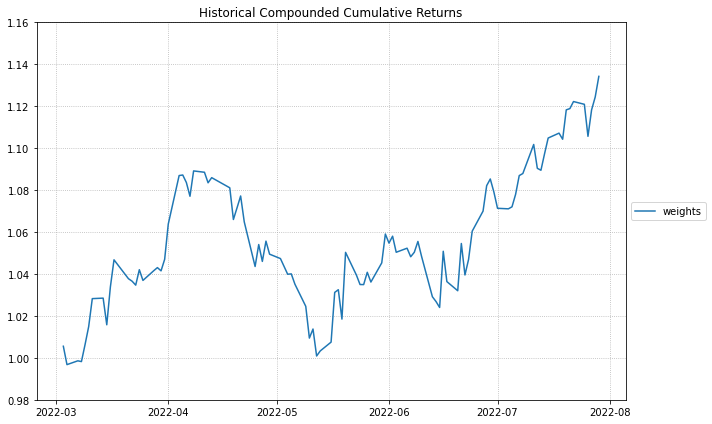

In [4]:
cagr_graph = rp.plot_series(returns=Y, w=w1, cmap='tab20', height=6, width=10,
                    ax=None)


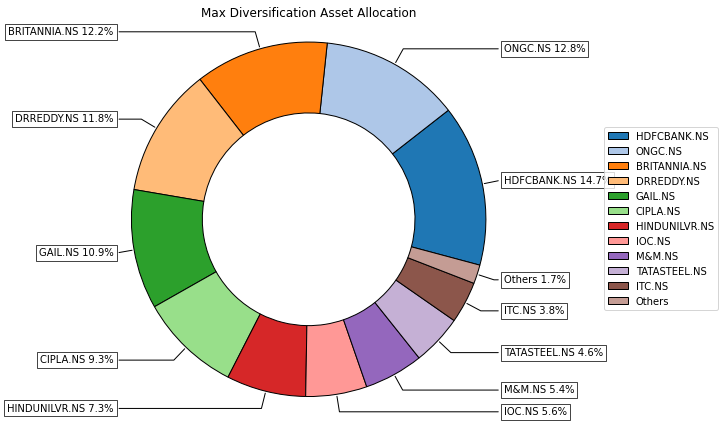

In [5]:
ax = rp.plot_pie(w=w1, title='Max Diversification Asset Allocation', others=0.05, nrow=25, cmap="tab20",
                 height=6, width=10, ax=None)


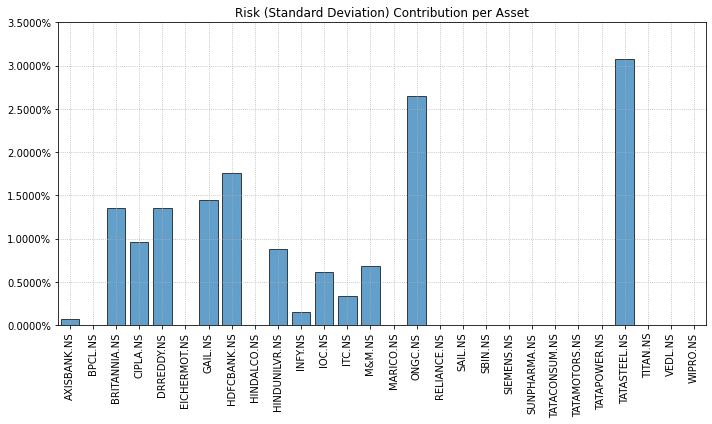

In [7]:
ax = rp.plot_risk_con(w=w1, cov=port.cov, returns=Y, rm=rm,
                      rf=0, alpha=0.05, color="tab:blue", height=6,
                      width=10, t_factor=252, ax=None, )


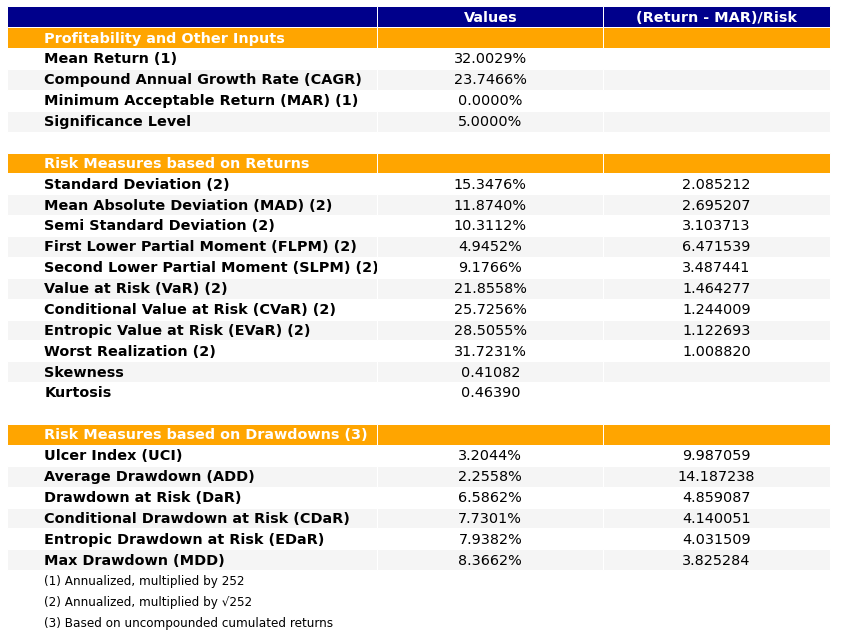

In [8]:
ax = rp.plot_table(returns=Y, w=w1, MAR=0, alpha=0.05, ax=None)


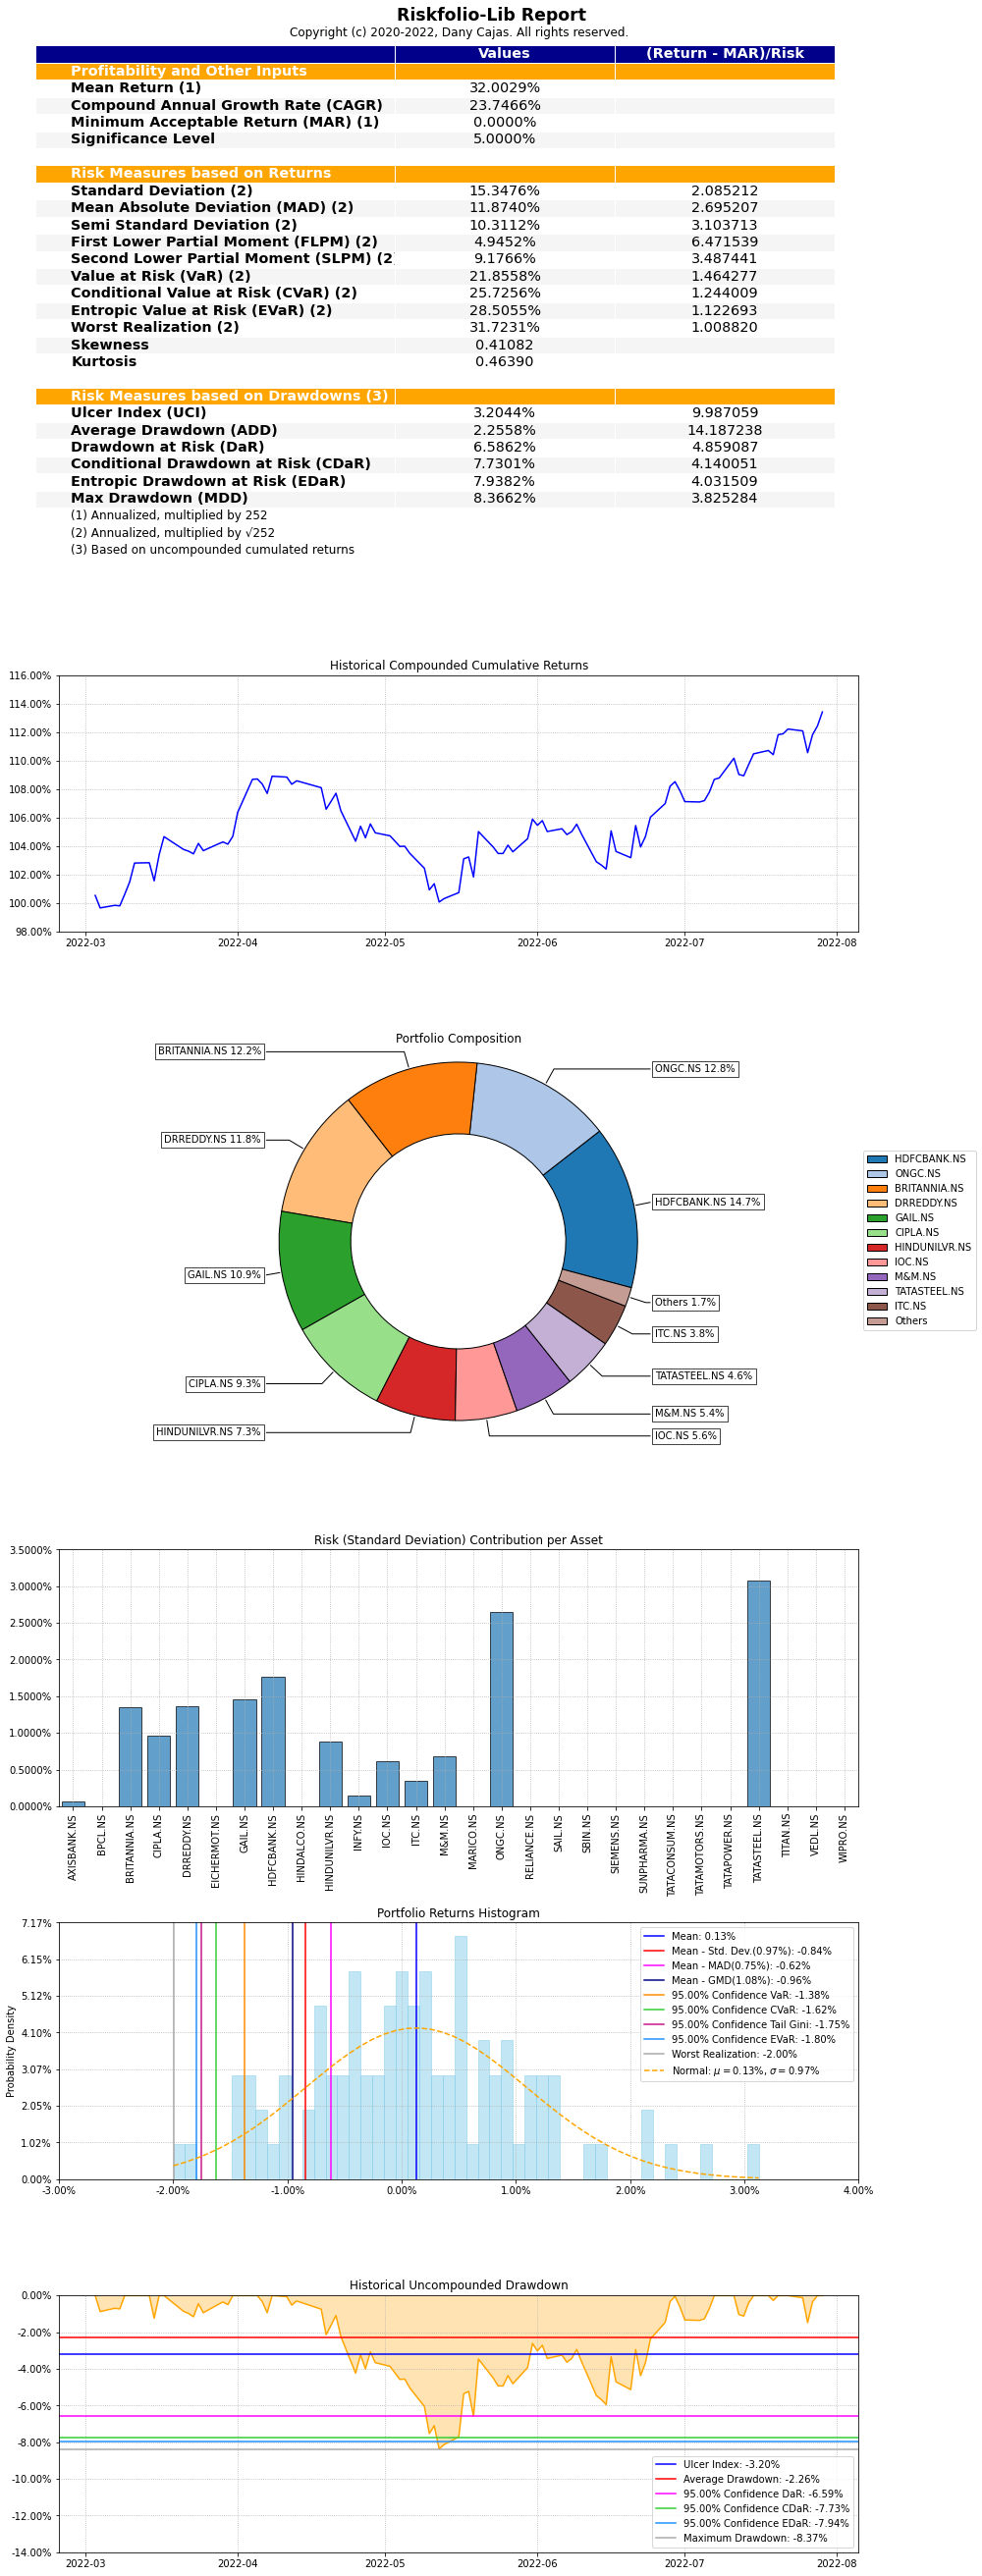

In [9]:
ax = rp.jupyter_report(returns=Y,
                       w=w1,
                       rm=rm,
                       rf=0,
                       alpha=0.05,
                       others=0.05,
                       nrow=25,
                       height=6,
                       width=14,
                       t_factor=252,
                       ini_days=1,
                       days_per_year=252,
                       bins=50,
                       )


In [ ]:
rp.excel_report(returns=Y,
                w=w1,
                rf=0,
                alpha=0.05,
                t_factor=252,
                ini_days=1,
                days_per_year=252,
                name="report")
